# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W ninejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [76]:
from math import *
import matplotlib.pyplot as plt
import operator

class Vector:
    def __init__(self, values) -> None:
        self.values = values

    def module(self):
        sum_of_squares = sum([pow(value, 2) for value in self.values])
        return sqrt(sum_of_squares)
    
    def __add__(self, vector_2):
        if len(self.values) != len(vector_2.values):
            print("Vectors have different sizes")
        else:
            result = list( map(operator.add, self.values, vector_2.values))
            return result
    
    def __sub__(self, vector_2):
        if len(self.values) != len(vector_2.values):
            print("Vectors have different sizes")
        else:
            result = list( map(operator.sub, self.values, vector_2.values))
            return result
        
    def __str__(self):
        return str(self.values)
    
    def __repr__(self) -> str:
        return f"<Vector({self.values}) at  {id(self)}"
    
    def __eq__(self, vector_2):
        bools = [self.values[i] == vector_2.values[i] for i in range(len(self.values))]
        return print(f"<Vector({bools}) at {id(self)}>")
    
    def __ne__(self, vector_2):
        bools = [self.values[i] != vector_2.values[i] for i in range(len(self.values))]
        return print(f"<Vector({bools}) at {id(self)}>")
    
    def __lt__(self, vector_2):
        bools = [self.values[i] < vector_2.values[i] for i in range(len(self.values))]
        return print(f"<Vector({bools}) at {id(self)}>")
    
    def __gt__(self, vector_2):
        bools = [self.values[i] > vector_2.values[i] for i in range(len(self.values))]
        return print(f"<Vector({bools}) at {id(self)}>")
    
    def __ge__(self, vector_2):
        bools = [self.values[i] >= vector_2.values[i] for i in range(len(self.values))]
        return print(f"<Vector({bools}) at {id(self)}>")
    
    def __le__(self, vector_2):
        bools = [self.values[i] <= vector_2.values[i] for i in range(len(self.values))]
        return print(f"<Vector({bools}) at {id(self)}>")
    
    def plot(self):
        if len(self.values) == 2:
            value_x = self.values[0]
            value_y = self.values[1]
            plt.quiver([0, 0, 0], [0, 0, 0], [value_x], [value_y], angles='xy', scale_units='xy', scale=1)
            plt.xlim(-value_x-1, value_x+1)
            plt.ylim(-value_y-1, value_y+1)
            plt.show()
        else:
            print("dimensions are not suitble")

    def __hash__(self):
        # Calculate the hash of the tuple of values
        s = [str(i) for i in self.values]
        res = int("".join(s))
        print(res)
        return res

    
    def __mul__(self, scalar):
        return [round(number * scalar, 4) for number in self.values]
    
    def __truediv__(self, scalar):
        if scalar != 0:
            return [round(number / scalar, 4) for number in self.values]
        else:
            return "You cant divide by 0"
        
    
V1 = Vector([1, 2, 3])
V2 = Vector([0, 2, 4])
print(V1.module())
print(V1 - V2)
print(V1)
V1

3.7416573867739413
[1, 0, -1]
[1, 2, 3]


<Vector([1, 2, 3]) at  5255170896

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów (ich modułów) za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [66]:
print(V1>V2)
print(V1>=V2)
print(V1==V2)
print(V1!=V2)
print(V1<V2)
print(V1<=V2)

<Vector([True, False, False]) at 5260184400>
None
<Vector([True, True, False]) at 5260184400>
None
<Vector([False, True, False]) at 5260184400>
None
<Vector([True, False, True]) at 5260184400>
None
<Vector([False, False, True]) at 5260184400>
None
<Vector([False, True, True]) at 5260184400>
None


### Zadanie 3

Napisz funkcję umożliwiającą wyświetlenie wektora (`Vector`) zaczepionego w punkcie (0,0) na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

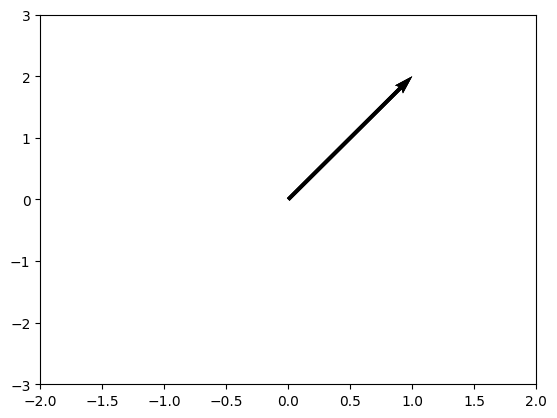

In [70]:
V3 = Vector([1, 2])
V3.plot()

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [82]:
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]


<Vector([True, True, True]) at 5254678928>


KeyError: <Vector([2, 2, 3]) at  5255911504

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [73]:
V4 = Vector([1, 2, 3])
print(V4 / 2)
print(V4 * 3)

[0.5, 1.0, 1.5]
[3, 6, 9]
